# 고객 구매 주기 예측 
- 20년 9월 22일의 데이터가 마지막이므로 23일을 현재로 두고 고객의 마지막 구매일이 82.xxx 이상이면 이탈로 보자
- 예를 들어 첫 구매 이후 83일 이상 구매가 없었을 시 첫 구매 데이터에 이탈 여부 컬럼은 이탈
- 첫구매이상인 고객이 있다면
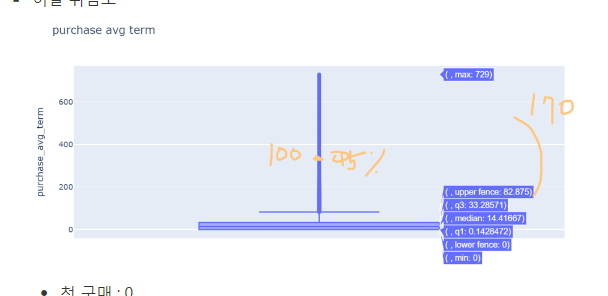

- 첫구매: 0
- min ~ q3:1
- q3 ~upper fence:2
- upper fence ~ 170일:3
- 170일 ~ max: 4

- 19년 11월에 첫 구매- 이탈 위험도 0 
- 20년 5월에 두번째 구매 - 이탈 위험도 4
- 20년 6월이 마지막 구매? - 이탈 위험도 1
- 할인 또는 프로모션을 어떻게 하면 좋을지도 확인 가능

In [55]:
import pandas as pd
df_clothes_name = pd.read_csv(r'D:\머신러닝 프로젝트\data\df_colthes_name.csv')
df_clothes_name.tail(5)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
22477262,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers,Denim,Blue,Trousers Denim
22477263,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers,Denim,Blue,Trousers Denim
22477264,2020-09-22,1267138,36.0,860135008,0.038119,Pat ls bd plaid,Shirt,Check,Khaki green,Shirts
22477265,2020-09-22,1267138,36.0,539060028,0.016017,TP BOSSE fancy OH hood SB,Hoodie,All over pattern,Orange,Jersey Basic
22477266,2020-09-22,1267138,36.0,539060028,0.016000,TP BOSSE fancy OH hood SB,Hoodie,All over pattern,Orange,Jersey Basic


In [56]:
# 요일 컬럼 추가(성미님 데이터)
df_clothes_name['t_dat'] = pd.to_datetime(df_clothes_name['t_dat'])
df_clothes_name['t_day'] = df_clothes_name.t_dat.dt.day_name() 

In [3]:
df_clothes_name.head(5)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday
2,2018-09-20,87205,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday
3,2018-09-20,332514,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday
4,2018-09-20,501565,22.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday


# 18년도  9~12월 요일별 평균 판매량 시각화

In [4]:
#년도, 월 컬럼 생성
df_clothes_name['year'] = df_clothes_name['t_dat'].dt.year
df_clothes_name['month'] = df_clothes_name['t_dat'].dt.month

In [5]:
# 2018년도 데이터만 필터링 후 월별, 요일별로 article_id의 개수(판매 수치)를 계산
df_2018 = df_clothes_name[df_clothes_name['year'] == 2018]
df_grouped_2018 = df_2018.groupby(['month', 't_day'])['article_id'].count().reset_index()

# 월별 일 수를 구하여 평균 판매 수치 계산
days_in_month_2018 = df_2018.groupby(['month'])['t_dat'].nunique().reset_index()
df_grouped_2018 = df_grouped_2018.merge(days_in_month_2018, on='month')
df_grouped_2018['average_sales'] = df_grouped_2018['article_id'] / df_grouped_2018['t_dat']


In [6]:
df_pivot_2018 = df_grouped_2018.pivot(index='month', columns='t_day', values = 'average_sales').fillna(0)
df_pivot_2018

t_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
9,7808.363636,3151.181818,10901.272727,6238.818182,6241.636364,2996.636364,3300.909091
10,4417.838710,4577.870968,4411.838710,3977.290323,4868.741935,5345.483871,6527.096774
11,6885.066667,3664.000000,4718.033333,4357.966667,4939.900000,3274.066667,3558.166667
12,3735.419355,3429.516129,4651.290323,3824.419355,4197.806452,2663.838710,3322.225806


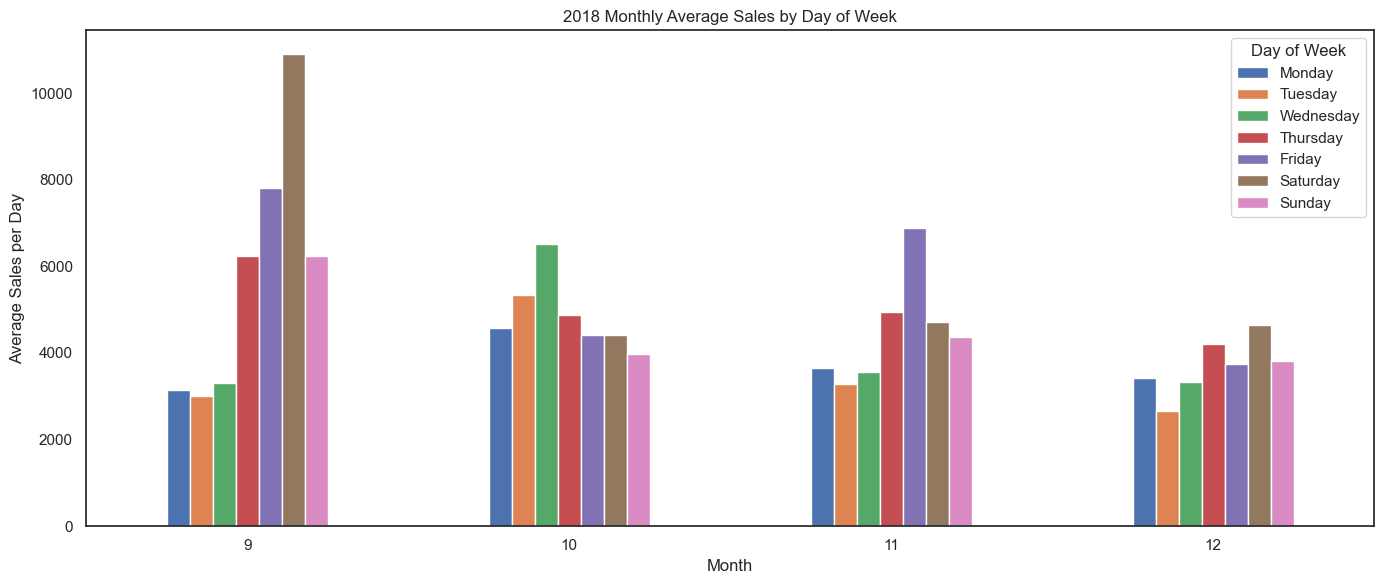

In [7]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_pivot_2018 = df_pivot_2018[ordered_days]

fig, ax = plt.subplots(figsize=(14, 6))
df_pivot_2018.plot(kind='bar', ax=ax)
ax.set_title('2018 Monthly Average Sales by Day of Week')
ax.set_ylabel('Average Sales per Day')
ax.set_xlabel('Month')
ax.legend(title='Day of Week')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


#2018년 9월 H&M 추석맞이 최대 50% 세일 진행

# 19년 9~12월

# 19년도 1~12월 일별 평균 판매

In [8]:
# 2018년도 데이터만 필터링 후 월별, 요일별로 article_id의 개수(판매 수치)를 계산
df_2019 = df_clothes_name[df_clothes_name['year'] == 2019]
df_grouped_2019 = df_2019.groupby(['month', 't_day'])['article_id'].count().reset_index()

# 월별 일 수를 구하여 평균 판매 수치 계산
days_in_month_2019 = df_2019.groupby(['month'])['t_dat'].nunique().reset_index()
df_grouped_2019 = df_grouped_2019.merge(days_in_month_2019, on='month')
df_grouped_2019['average_sales'] = df_grouped_2019['article_id'] / df_grouped_2019['t_dat']


In [9]:
df_pivot_2019 = df_grouped_2019.pivot(index='month', columns='t_day', values = 'average_sales').fillna(0)
df_pivot_2019

t_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,3748.032258,3058.580645,3927.064516,3342.516129,4821.548387,4024.677419,4943.677419
2,4523.892857,3404.285714,5139.178571,3789.321429,4338.821429,3693.035714,4008.821429
3,4820.225806,3023.870968,5227.193548,4579.516129,3876.354839,3523.193548,4265.225806
4,4455.533333,4932.500000,5829.333333,3711.200000,4509.033333,5886.866667,5064.633333
5,5918.354839,3596.096774,4432.548387,3618.322581,6672.580645,3817.903226,5801.806452
6,5915.100000,5428.866667,7103.500000,6134.666667,6434.600000,5697.866667,6898.200000
7,4726.387097,6412.580645,4757.161290,4223.741935,5282.032258,6384.741935,8520.451613
8,4592.000000,3597.516129,4389.096774,3304.354839,5301.096774,3868.322581,4156.580645
9,3615.300000,4248.533333,7641.400000,4490.600000,3810.366667,3748.533333,3892.600000


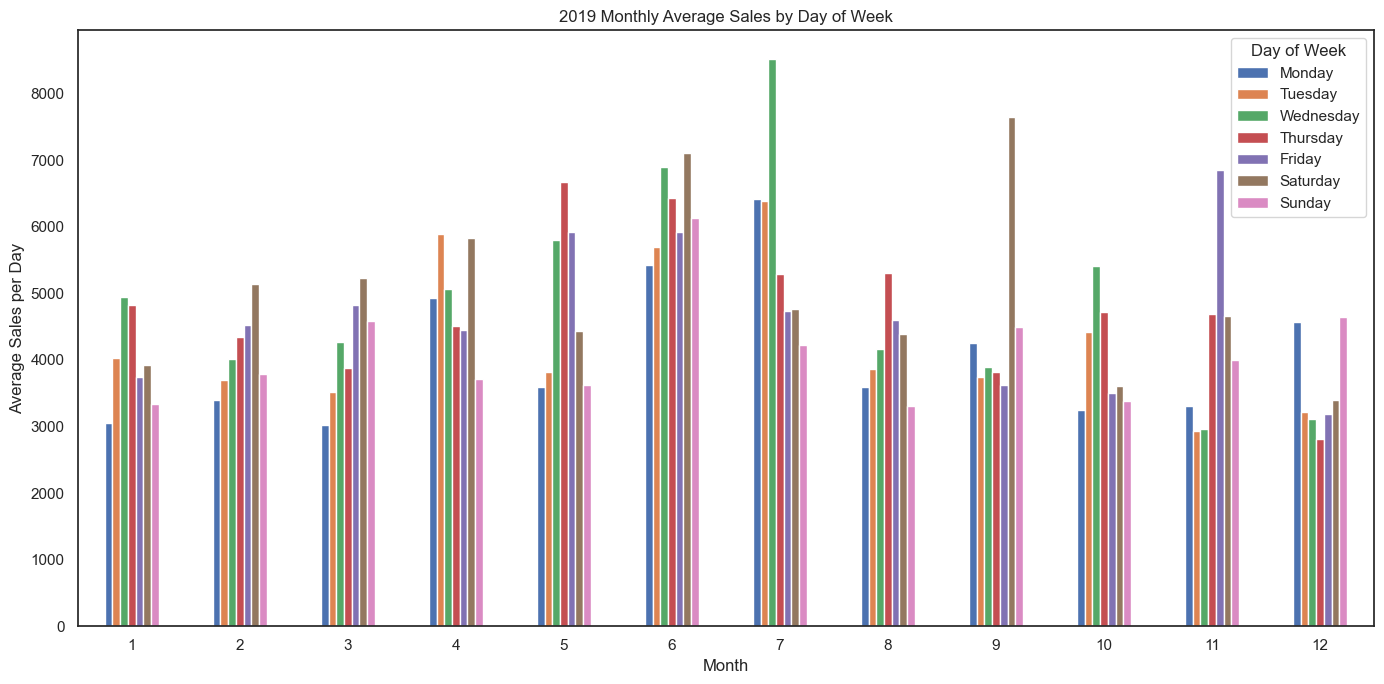

In [10]:
# 컬럼 순서를 "월화수목금토일" 순으로 재배열
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_pivot_2019 = df_pivot_2019[ordered_days]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 7))
df_pivot_2019.plot(kind='bar', ax=ax)
ax.set_title('2019 Monthly Average Sales by Day of Week')
ax.set_ylabel('Average Sales per Day')
ax.set_xlabel('Month')
ax.legend(title='Day of Week')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


#19년 7월 H&M 최대 70% 세일 + 15% 추가 할인 이벤트 (셔츠, 원피스, 티셔츠, 팬츠)
#19년 9월 H&M 최대 가을 스타일 제안 - 최대 50% 할인 이벤트
#19년 10월 H&M 미드 시즌 최대 70% 세일
#19년 11월 H%M 해피 뺴빼로데이 1+1 이벤트


#20년도

In [11]:
# 2018년도 데이터만 필터링 후 월별, 요일별로 article_id의 개수(판매 수치)를 계산
df_2020 = df_clothes_name[df_clothes_name['year'] == 2020]
df_grouped_2020 = df_2020.groupby(['month', 't_day'])['article_id'].count().reset_index()

# 월별 일 수를 구하여 평균 판매 수치 계산
days_in_month_2020 = df_2020.groupby(['month'])['t_dat'].nunique().reset_index()
df_grouped_2020 = df_grouped_2020.merge(days_in_month_2020, on='month')
df_grouped_2020['average_sales'] = df_grouped_2020['article_id'] / df_grouped_2020['t_dat']


In [12]:
df_pivot_2020 = df_grouped_2020.pivot(index='month', columns='t_day', values = 'average_sales').fillna(0)
df_pivot_2020

t_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,4185.387097,2810.129032,3552.709677,3294.096774,4234.290323,2713.225806,3538.419355
2,3346.586207,2962.275862,4532.172414,3029.655172,3707.586207,3101.241379,3133.241379
3,2904.290323,3398.387097,3147.612903,3936.354839,3151.483871,3708.870968,3676.193548
4,4051.000000,3200.233333,7607.566667,3641.266667,4883.500000,3222.700000,4719.166667
5,5244.612903,3433.903226,5095.096774,3373.741935,4000.032258,3625.419355,4208.354839
6,5431.300000,5511.366667,5436.800000,4372.233333,6007.266667,6044.233333,6975.666667
7,4891.806452,3550.838710,3667.419355,2899.677419,5338.548387,3814.387097,5655.096774
8,3447.387097,4335.870968,4141.064516,3589.677419,3973.225806,3948.451613,4762.193548
9,4005.863636,3482.272727,4144.363636,3748.909091,4213.545455,4697.636364,3555.909091


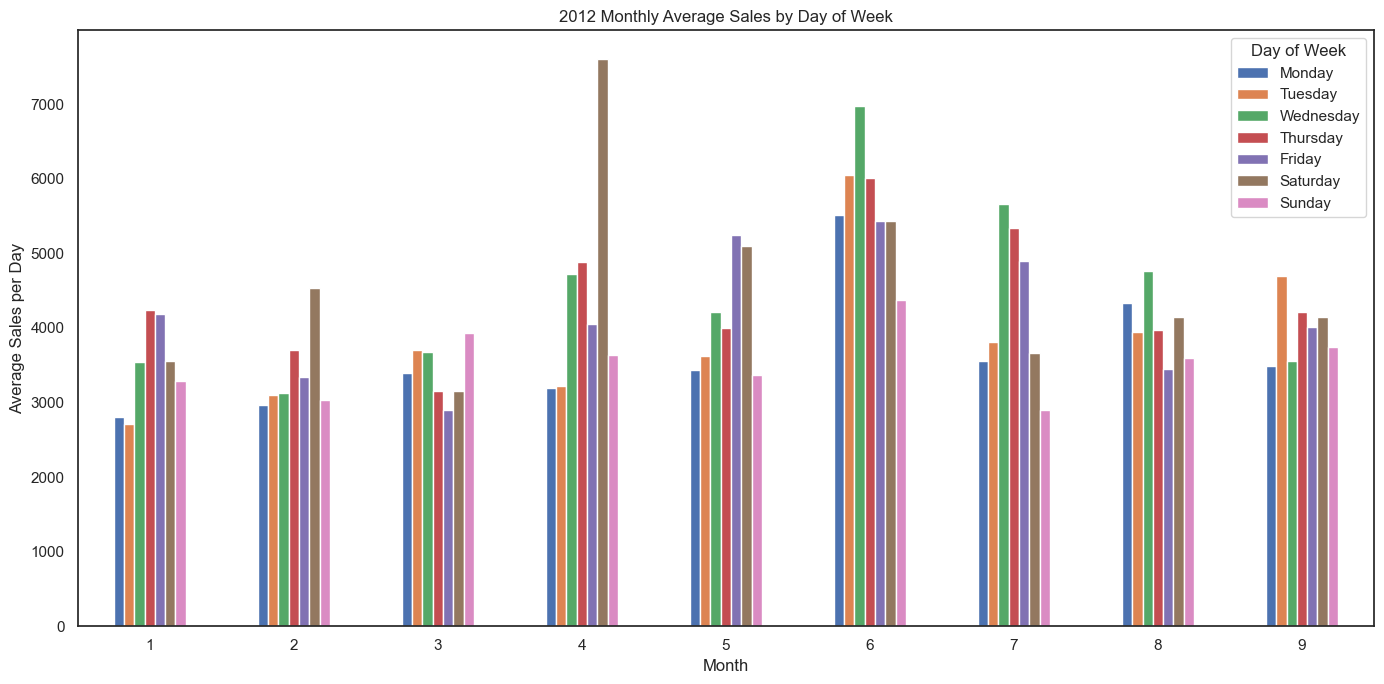

In [13]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_pivot_2020 = df_pivot_2020[ordered_days]

fig, ax = plt.subplots(figsize=(14, 7))
df_pivot_2020.plot(kind='bar', ax=ax)
ax.set_title('2012 Monthly Average Sales by Day of Week')
ax.set_ylabel('Average Sales per Day')
ax.set_xlabel('Month')
ax.legend(title='Day of Week')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


#2020년 4월동안 옷을 매장에 재활용하면 쿠폰 지급 4만원 구매하고 5천원 할인
#2020년 6월 최대 50% 할인 (티셔츠, 블라우스, 팬츠, 원피스)
#2020년 7월 H%M 라스트 피스 추가 20% 할인

### 18년도10~12월,  19년도10~12월 을 이용하면 20년도 10~12월를 예측할수있을까?
### 10월~12월은 겨울이니 겨울에 관한 제품을 추천할까?

In [14]:
df_pivot_2018

t_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
9,3151.181818,2996.636364,3300.909091,6241.636364,7808.363636,10901.272727,6238.818182
10,4577.870968,5345.483871,6527.096774,4868.741935,4417.838710,4411.838710,3977.290323
11,3664.000000,3274.066667,3558.166667,4939.900000,6885.066667,4718.033333,4357.966667
12,3429.516129,2663.838710,3322.225806,4197.806452,3735.419355,4651.290323,3824.419355


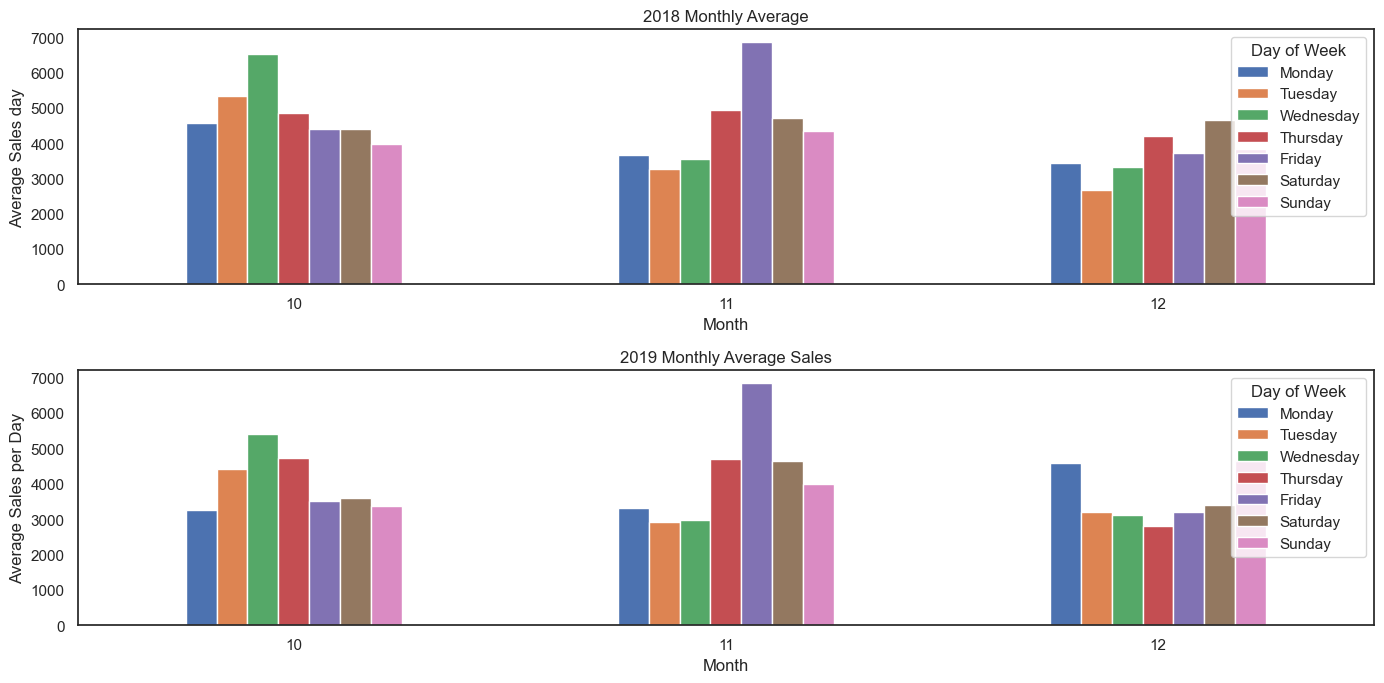

In [15]:
df_2018_filtered = df_pivot_2018.loc[10:12] # 별도로 컬럼을 지정하지 않고 loc를 사용하면 인덱스를 가져온다.
df_2019_filtered = df_pivot_2019.loc[10:12]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,7))

df_2018_filtered.plot(kind='bar', ax=ax1)
ax1.set_title('2018 Monthly Average')
ax1.set_ylabel('Average Sales day')
ax1.set_xlabel('Month')
ax1.legend(title='Day of Week')
ax1.set_xticks(range(len(df_2018_filtered)))
ax1.set_xticklabels(df_2018_filtered.index)
ax1.tick_params(axis='x', rotation=0)


df_2019_filtered.plot(kind='bar', ax=ax2)
ax2.set_title('2019 Monthly Average Sales')
ax2.set_ylabel('Average Sales per Day')
ax2.set_xlabel('Month')
ax2.legend(title='Day of Week')
ax2.set_xticks(range(len(df_2019_filtered)))
ax2.set_xticklabels(df_2019_filtered.index)
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [16]:
#18~19년도의 상품과 고객 customer_label을 수집해보면 뭔가 도출되지 않을까

# 18,19년도의  10월~12월의 상품을 조회 해보자

In [17]:
df_clothes_name.head(2)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day,year,month
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday,2018,9
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday,2018,9


In [18]:
# df_clothes_name = df_clothes_name([df_clothes_name['month'] == '10'] & ([df_clothes_name['month'] =='11']) & ([df_clothes_name['month'] ==11]) )[article_id]

# 조건 설정
condition = (df_clothes_name['month'].isin([10, 11, 12])) & (df_clothes_name['year'] == 2019)

# Get all columns for rows that meet the condition
filtered_data = df_clothes_name[condition]
filtered_data


,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day,year,month
1209,2019-10-02,352987,55.0,550718001,0.025407,Chamonix ski pants,Trousers,Solid,Black,Trousers,Wednesday,2019,10
1212,2019-11-14,761867,32.0,550718001,0.022017,Chamonix ski pants,Trousers,Solid,Black,Trousers,Thursday,2019,11
1219,2019-11-20,328168,23.0,550718001,0.022017,Chamonix ski pants,Trousers,Solid,Black,Trousers,Wednesday,2019,11
1220,2019-10-08,1214154,33.0,550718001,0.025407,Chamonix ski pants,Trousers,Solid,Black,Trousers,Tuesday,2019,10
1221,2019-10-17,1356728,61.0,550718001,0.022017,Chamonix ski pants,Trousers,Solid,Black,Trousers,Thursday,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22477016,2019-12-30,15548,52.0,497637024,0.030492,Bobby (1),Jacket,Solid,Red,Outdoor,Monday,2019,12
22477021,2019-11-18,9773,39.0,692844023,0.016932,TP Niclas low price jogger,Trousers,All over pattern,Blue,Trousers,Monday,2019,11
22477022,2019-12-26,1202468,32.0,761793001,0.042356,ES VERONICA down jacket,Jacket,Solid,Blue,Outdoor,Thursday,2019,12
22477039,2019-12-18,1040945,25.0,814673001,0.042356,5P LS DRESS SOLID,Dress,Solid,Pink,Jersey Basic,Wednesday,2019,12


In [19]:
unique_articles = filtered_data.drop_duplicates(subset='article_id').head(10)
unique_articles

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day,year,month
1209,2019-10-02,352987,55.0,550718001,0.025407,Chamonix ski pants,Trousers,Solid,Black,Trousers,Wednesday,2019,10
2206,2019-10-01,1126882,31.0,413707001,0.033881,Fancy Leggings,Leggings/Tights,Treatment,Grey,Trousers,Tuesday,2019,10
3625,2019-10-09,122337,41.0,478549001,0.035576,Eagel PU Pants Slim RW,Trousers,Treatment,Black,Trousers,Wednesday,2019,10
6515,2019-10-26,1192797,31.0,724244001,0.010153,CS SARAH SMOCK,Top,Solid,Black,Jersey Fancy,Saturday,2019,10
7825,2019-11-30,483648,21.0,681569001,0.012695,Maxine lace body,Vest top,Lace,Black,Jersey Fancy,Saturday,2019,11
9742,2019-10-02,416527,19.0,703843001,0.015237,Demi l/s,Top,Solid,Black,Jersey Fancy,Wednesday,2019,10
9879,2019-12-16,816761,41.0,609598006,0.019814,POLLY BLOUSE,Blouse,Solid,White,Blouses,Monday,2019,12
12198,2019-12-04,438756,28.0,562637001,0.034153,Sandy,Blouse,Solid,Red,Blouses,Wednesday,2019,12
12537,2019-12-14,1102291,28.0,682334001,0.036610,Ella Dress Sequin,Dress,Sequin,Black,Dresses Ladies,Saturday,2019,12
13095,2019-10-03,649773,22.0,444325004,0.018966,Tiffany dress,Dress,Solid,Black,Jersey Basic,Thursday,2019,10


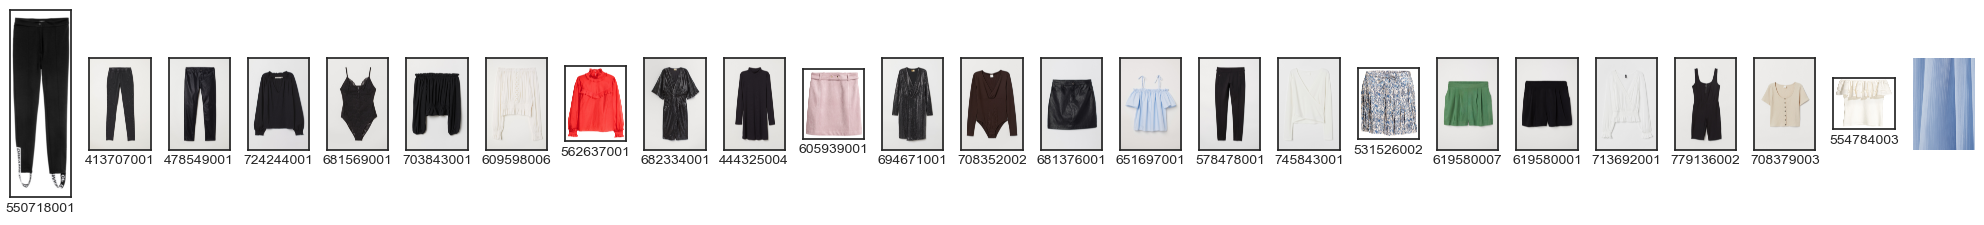

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 중복된 article_id를 제거하고 상위 10개 항목만 선택
unique_articles = filtered_data.drop_duplicates(subset='article_id').head(25)

# 시각화 준비
f, ax = plt.subplots(1, len(unique_articles), figsize=(20,10))  # 상품 개수에 따라 subplot 개수를 조절

for i, (_, data) in enumerate(unique_articles.iterrows()):
    desc = str(data['article_id'])  
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    
    img_path = f'D:/머신러닝 프로젝트/h-and-m-personalized-fashion-recommendations (1)/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg'
    img = mpimg.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)

plt.axis('off')
plt.tight_layout()  # 이미지 간격 조절
plt.show()



In [21]:
#19년도 10,11,12월  데이터
unique_articles.tail()

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day,year,month
34709,2019-10-02,1006195,49.0,713692001,0.016932,NEW POLLY BLOUSE,Blouse,Solid,White,Blouses,Wednesday,2019,10
36609,2019-12-22,353251,24.0,779136002,0.030492,Croydon unitard,Jumpsuit/Playsuit,Solid,Black,Dresses Ladies,Sunday,2019,12
37109,2019-11-27,694142,53.0,708379003,0.008458,Simone,Top,Solid,Beige,Jersey Fancy,Wednesday,2019,11
39609,2019-10-14,777111,38.0,554784003,0.011847,Bee top,Top,Solid,White,Jersey Fancy,Monday,2019,10
39980,2019-12-27,857162,38.0,659983002,0.016932,If I Ruled The World,Top,Solid,Blue,Dresses Ladies,Friday,2019,12


# 18~19년 10,11,12 데이터를 이용해서 진행해보자
### 먼저 19년 10~12 데이터 사용해보자

In [22]:
condition = (df_clothes_name['month'].isin([10, 11, 12])) & (df_clothes_name['year'] == 2019)

# Get all columns for rows that meet the condition
df_clothes_name2019 = df_clothes_name[condition]
df_clothes_name2019.head(1)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day,year,month
1209,2019-10-02,352987,55.0,550718001,0.025407,Chamonix ski pants,Trousers,Solid,Black,Trousers,Wednesday,2019,10


In [23]:
# 겨울 상관 없이 짧은 옷들도 존재한다.
unique_df_clothes_name2 = df_clothes_name2019['article_id'].nunique()
total_rows2 = len(df_clothes_name2019)

ratio2 = unique_df_clothes_name2 / total_rows2 * 100
print(ratio2)


1.0586051524868707


In [24]:
# article_id 제품 
#nomalize=True 각 고유 값의 빈도를 전체 항목 수로 나눈 비율 반환
ratios2 = df_clothes_name2019['article_id'].value_counts(normalize=True) * 100
print(ratios2)



706016001    0.414307
673677002    0.256344
562245046    0.209485
772902001    0.206482
706016002    0.204427
               ...   
694860002    0.000040
688474003    0.000040
674014001    0.000040
783543004    0.000040
466948031    0.000040
Name: article_id, Length: 26793, dtype: float64


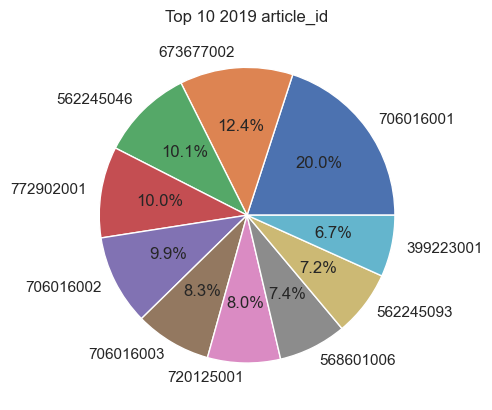

In [59]:
top_5_articles = df_clothes_name2019['article_id'].value_counts().head(10)

top_5_articles.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 2019 article_id')
plt.ylabel('')
plt.show()



# 18년도 10,11,12월

In [26]:
new_condition = (df_clothes_name['month'].isin([10, 11, 12])) & (df_clothes_name['year'] == 2018)
df_clothes_2018 = df_clothes_name[new_condition]
df_clothes_2018.head(1)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day,year,month
11,2018-10-10,281710,32.0,505221004,0.012186,Inca Jumper,Sweater,Melange,Pink,Knitwear,Wednesday,2018,10


In [27]:
unique_df_clothes_2018 = df_clothes_2018['article_id'].nunique()
total_rows_2018 = len(df_clothes_2018)
ratio_2018 = unique_df_clothes_2018 / total_rows_2018 * 100
print(ratio_2018)


0.9787575788632071


In [28]:
ratios_2018 = df_clothes_2018['article_id'].value_counts(normalize=True) * 100
print(ratios_2018)

399223001    0.226076
565379001    0.203865
539723001    0.202472
562245001    0.202436
539723005    0.192545
               ...   
604387002    0.000036
545263002    0.000036
550580004    0.000036
398074056    0.000036
568808019    0.000036
Name: article_id, Length: 27409, dtype: float64


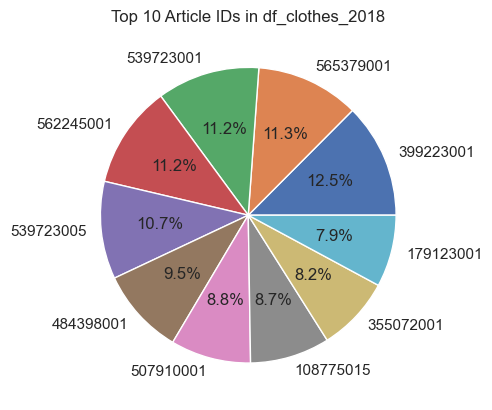

In [60]:
top_5_articles_2018 = df_clothes_2018['article_id'].value_counts().head(10)
top_5_articles_2018.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Article IDs in df_clothes_2018')
plt.ylabel('')
plt.show()

# 상위 제품에 대한 가격 변동

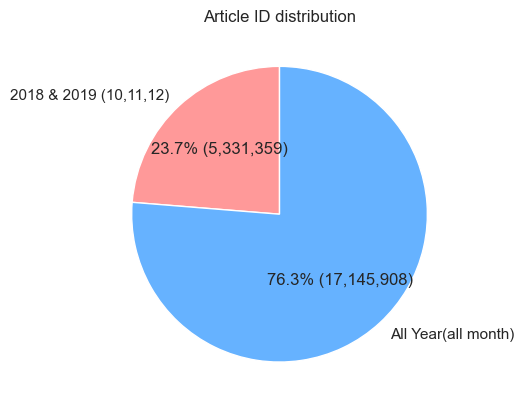

In [30]:
import matplotlib.pyplot as plt

# 항목 수 계산
count_2018_2019 = len(df_clothes_2018) + len(df_clothes_name2019)
count_total = len(df_clothes_name)

# 데이터와 레이블 준비
counts = [count_2018_2019, count_total - count_2018_2019]
labels = ['2018 & 2019 (10,11,12)', 'All Year(all month)']

# 파이 차트 시각화
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])

for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{autotext.get_text()} ({counts[i]:,})')
    
ax.set_title('Article ID distribution')
plt.show()

In [31]:
# Extract Year and Month from 't_dat' column
df_clothes_name['Year'] = df_clothes_name['t_dat'].dt.year
df_clothes_name['Month'] = df_clothes_name['t_dat'].dt.month

# Filter the dataframe based on the specified conditions
filtered_df = df_clothes_name[
    ((df_clothes_name['Year'] == 2018) | (df_clothes_name['Year'] == 2019)) & 
    (df_clothes_name['Month'].isin([10, 11, 12]))
]

filtered_df.head(5)


,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,t_day,year,month,Year,Month
11,2018-10-10,281710,32.0,505221004,0.012186,Inca Jumper,Sweater,Melange,Pink,Knitwear,Wednesday,2018,10,2018,10
13,2018-11-29,559577,49.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday,2018,11,2018,11
15,2018-10-04,136519,28.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear,Thursday,2018,10,2018,10
22,2018-10-10,1245313,35.0,505221004,0.012186,Inca Jumper,Sweater,Melange,Pink,Knitwear,Wednesday,2018,10,2018,10
25,2018-10-10,525311,21.0,505221004,0.012203,Inca Jumper,Sweater,Melange,Pink,Knitwear,Wednesday,2018,10,2018,10


In [32]:
df_clothes_name = filtered_df

# article_id를 이용하여 소비 주기 패턴 전처리

- 기준날짜: 2020년 9월 22일 마지막 데이터
- 이탈 여부: 고객의 마지막 구매일 기준 82일 지나면 '이탈'
- 이탈 위험도 판정:
    - 첫 구매 후 82일 이하: 이탈 위험 0
    - 첫 구매후 min~1사분위수(25): 이탈 위험 1
    - 첫 구매후 1사분위수 ~3사분위수(75%)범위: 이탈 위험2
    - 첫 구매후 3 사분위수 ~ 170일 범위: 이탈 위험도3
    - 첫 구매 후 170일 초과: 이탈 위험4

In [33]:
# 이탈 여부 컬럼 생성과 이탈 위험도 컬럼 생성
# 마지막 구매일 기준 오랜 시간동안 구매를 하지 않았는지 고객 이탈과 위험도 계산

import pandas as pd
import numpy as np

def calculate_churn_risk(df):
    current_date = pd.Timestamp('2020-09-23')
    
    # 마지막 구매일 계산
    # 각 고객별로 그룹화한 후, t_dat 구매날짜 최댓값을 계산하여 마지막 구매일을 얻는다.
    last_purchase = df.groupby('customer_label')['t_dat'].max()
    
    churn_days = (current_date - last_purchase).dt.days#마지막 구매일로부터 현재까지의 일수 계산 
                                                       #현재 날짜에서 마지막 구매일을 뺸 결과를 일수로 변환하여, 마지막 구매로부터 현재까지의 기간을 계산
    
    df = df.merge(churn_days.rename('days_since_last_purchase'), left_on='customer_label', right_index=True)
    #각 고객의 마지막 구매일로부터 일수를 원본 데이터프레임에 병합
    
    # 이탈 여부 컬럼 추가
    df['churn'] = df['days_since_last_purchase'] > 82 #마지막 구매일로부터 82일이 초과된 고객을 이탈로 판정
    
    # 이탈 위험도 계산
    conditions = [
        df['days_since_last_purchase'] <= 82,
        df['days_since_last_purchase'] <= churn_days.quantile(0.25),
        df['days_since_last_purchase'] <= churn_days.quantile(0.75),
        df['days_since_last_purchase'] <= 170,
        df['days_since_last_purchase'] > 170
    ]
    values = [0, 1, 2, 3, 4]
    df['churn_risk'] = np.select(conditions, values)
    
    return df

df_clothes_name = calculate_churn_risk(df_clothes_name)


In [34]:

#각 고객의 첫 구매일, 마지막 구매일, 총 구매 횟수 등을 계산하여 데이터프레임에 추가

def add_additional_columns(df_clothes_name):
    # 첫 구매일 계산
    first_purchase = df_clothes_name.groupby('customer_label')['t_dat'].min()

    # 마지막 구매일 계산 
    last_purchase = df_clothes_name.groupby('customer_label')['t_dat'].max()

    # 총 구매 횟수 계산
    purchase_count = df_clothes_name.groupby('customer_label').size()

    # 계산한 값을 원본 데이터프레임에 머지
    df_clothes_name = df_clothes_name.merge(first_purchase.rename('first_purchase_date'), left_on='customer_label', right_index=True)
    df_clothes_name = df_clothes_name.merge(last_purchase.rename('last_purchase_date'), left_on='customer_label', right_index=True)
    df_clothes_name = df_clothes_name.merge(purchase_count.rename('purchase_count'), left_on='customer_label', right_index=True)

    return df_clothes_name

df_clothes_name = add_additional_columns(df_clothes_name)


- churn_risk 컬럼 설명
- 마지막 구매일로부터 82일 이하 churn_risk = 0
- 마지막 구매일부터 25% 지점 이하 churn_risk =1
- 마지막 구매일로부터 75% 이하 churn_risk = 2
- 170일 이하 churn_risk = 3
- 170일 초과 churn_risk =4

In [53]:
df_clothes_name.head(10)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,...,month,Year,Month,days_since_last_purchase,churn,churn_risk,first_purchase_date,last_purchase_date,purchase_count,generation
11,2018-10-10,281710,32.0,505221004,0.012186,Inca Jumper,Sweater,Melange,Pink,Knitwear,...,10,2018,10,277,True,1,2018-10-10,2019-12-21,307,30-49
8394,2018-12-20,281710,32.0,703843001,0.011847,Demi l/s,Top,Solid,Black,Jersey Fancy,...,12,2018,12,277,True,1,2018-10-10,2019-12-21,307,30-49
1068008,2018-10-10,281710,32.0,583534002,0.013542,Bradley,Trousers,Solid,Black,Jersey Basic,...,10,2018,10,277,True,1,2018-10-10,2019-12-21,307,30-49
1701196,2019-10-15,281710,32.0,808573001,0.016932,Grey Victorville cargo,Trousers,All over pattern,Grey,Trousers,...,10,2019,10,277,True,1,2018-10-10,2019-12-21,307,30-49
1722100,2018-12-20,281710,32.0,675139003,0.010153,Olivia,Top,Solid,Black,Jersey Fancy,...,12,2018,12,277,True,1,2018-10-10,2019-12-21,307,30-49
1722101,2018-12-20,281710,32.0,675139003,0.010153,Olivia,Top,Solid,Black,Jersey Fancy,...,12,2018,12,277,True,1,2018-10-10,2019-12-21,307,30-49
2228857,2019-10-04,281710,32.0,632982054,0.006763,Jennifer tee,Top,All over pattern,Beige,Jersey Fancy,...,10,2019,10,277,True,1,2018-10-10,2019-12-21,307,30-49
2267928,2019-10-04,281710,32.0,751542002,0.016932,Banjo dress,Dress,Glittering/Metallic,Black,Dresses Ladies,...,10,2019,10,277,True,1,2018-10-10,2019-12-21,307,30-49
2267929,2019-10-04,281710,32.0,751542002,0.016932,Banjo dress,Dress,Glittering/Metallic,Black,Dresses Ladies,...,10,2019,10,277,True,1,2018-10-10,2019-12-21,307,30-49
2267930,2019-12-02,281710,32.0,751542002,0.008458,Banjo dress,Dress,Glittering/Metallic,Black,Dresses Ladies,...,12,2019,12,277,True,1,2018-10-10,2019-12-21,307,30-49


In [51]:
#성미님의 고민 (같은 날짜의 제품이 중복되면 카운트에 문제가 생긴다.)
#2018-10-24    22개
customer_data = df_clothes_name[df_clothes_name['customer_label'] == 281710][['t_dat', 'article_id', 'customer_label']]
date_counts = customer_data['t_dat'].value_counts()
print(date_counts)


2019-12-19    60
2018-10-24    22
2019-10-04    22
2018-10-10    19
2018-10-17    19
2019-10-15    17
2019-11-20    15
2019-12-21    13
2018-12-21    12
2019-10-14    12
2019-12-11    11
2018-10-16    11
2019-10-18    10
2018-12-20     9
2019-10-06     8
2019-11-23     7
2019-12-02     6
2018-11-10     6
2019-12-08     5
2018-12-12     4
2018-11-14     4
2019-11-21     4
2018-12-24     3
2018-10-31     3
2018-11-02     2
2019-10-17     2
2019-12-17     1
Name: t_dat, dtype: int64


In [52]:
#2018-10-24    22개(카운트가 잘되는거 같은데 좀더 봐야할 부분을 생각해봐야겠다.)
specific_data = customer_data[customer_data['t_dat'] == '2018-10-24']
print(specific_data['article_id'])

2944176     584928001
2982619     651685002
4753892     648769003
4758699     636926001
8405073     626813005
8405074     626813005
10000610    613246004
10181941    613456007
12232494    657395003
13809354    641686001
14067752    626813003
15880344    585754001
17572031    554477008
17630978    620981001
17773157    615047004
19374798    615054002
20506877    579990002
21029268    631427003
21029269    631427003
21105179    625673006
21643481    638019001
22349344    570190001
Name: article_id, dtype: int64


# 이탈 위험 고객 구매 패턴 시각화

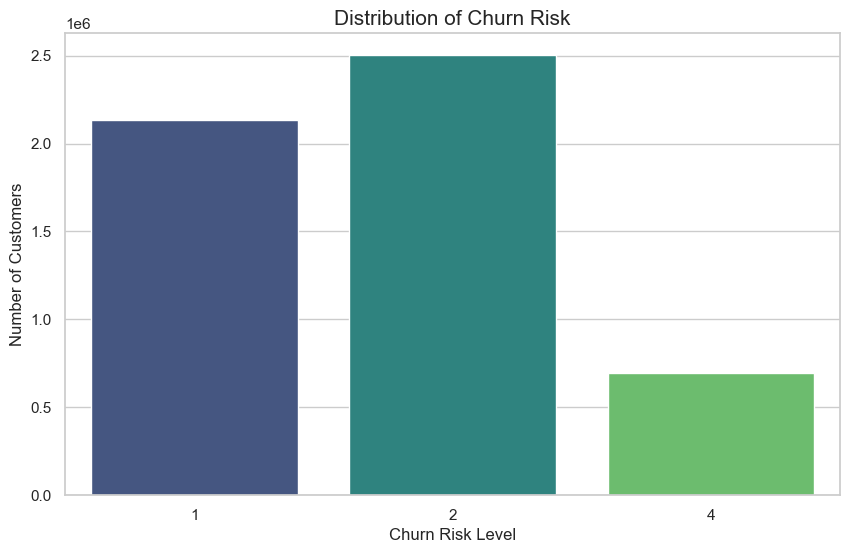

In [36]:
#이탈자 시각화
import seaborn as sns

# Setting the plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the count of each churn risk category
ax = sns.countplot(x="churn_risk", data=df_clothes_name, palette="viridis")

# Setting the title and labels
ax.set_title('Distribution of Churn Risk', fontsize=15)
ax.set_xlabel('Churn Risk Level', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)

plt.show()


In [37]:
# Age binning based on the provided bins and labels
age_bins = [19, 24, 29, 49, 69, 99]
labels = ['20-24', '25-29', '30-49', '50-69', '70+']

df_clothes_name['generation'] = pd.cut(df_clothes_name['age'], bins=age_bins, labels=labels, right=True)

# Checking the first few rows of the updated dataframe
df_clothes_name.head()


,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,...,month,Year,Month,days_since_last_purchase,churn,churn_risk,first_purchase_date,last_purchase_date,purchase_count,generation
11,2018-10-10,281710,32.0,505221004,0.012186,Inca Jumper,Sweater,Melange,Pink,Knitwear,...,10,2018,10,277,True,1,2018-10-10,2019-12-21,307,30-49
8394,2018-12-20,281710,32.0,703843001,0.011847,Demi l/s,Top,Solid,Black,Jersey Fancy,...,12,2018,12,277,True,1,2018-10-10,2019-12-21,307,30-49
1068008,2018-10-10,281710,32.0,583534002,0.013542,Bradley,Trousers,Solid,Black,Jersey Basic,...,10,2018,10,277,True,1,2018-10-10,2019-12-21,307,30-49
1701196,2019-10-15,281710,32.0,808573001,0.016932,Grey Victorville cargo,Trousers,All over pattern,Grey,Trousers,...,10,2019,10,277,True,1,2018-10-10,2019-12-21,307,30-49
1722100,2018-12-20,281710,32.0,675139003,0.010153,Olivia,Top,Solid,Black,Jersey Fancy,...,12,2018,12,277,True,1,2018-10-10,2019-12-21,307,30-49


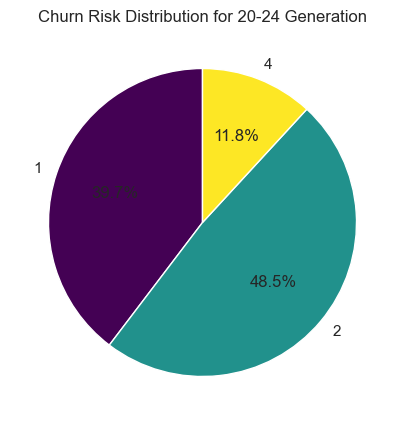

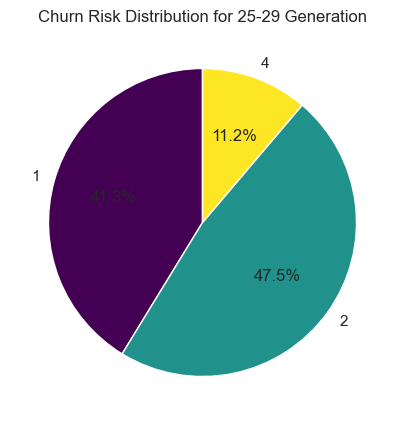

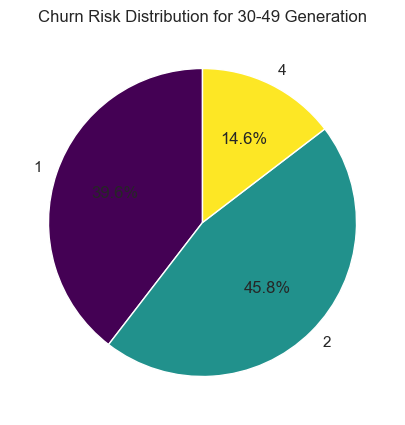

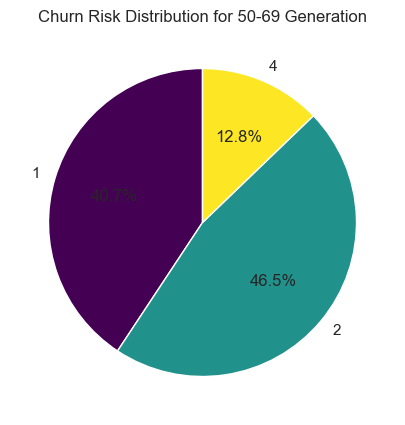

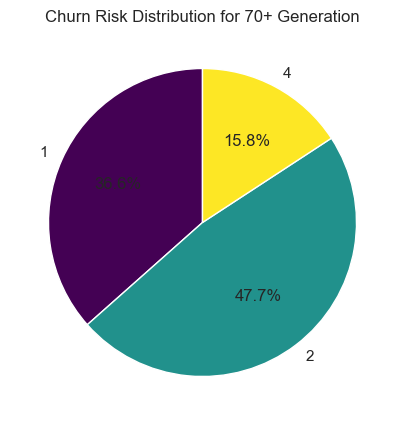

In [38]:
# Grouping by generation and churn_risk to get the count for each combination
age_churn = df_clothes_name.groupby(['generation', 'churn_risk']).size().reset_index(name='counts')

# Pivoting the data for visualization
age_churn_pivot = age_churn.pivot(index='generation', columns='churn_risk', values='counts').fillna(0)

# Plotting pie charts for each generation
for generation in age_churn_pivot.index:
    plt.figure(figsize=(8, 5))
    age_churn_pivot.loc[generation].plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Churn Risk Distribution for {generation} Generation')
    plt.ylabel("")
    plt.show()


In [39]:
df_clothes_name.head(5)


,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,...,month,Year,Month,days_since_last_purchase,churn,churn_risk,first_purchase_date,last_purchase_date,purchase_count,generation
11,2018-10-10,281710,32.0,505221004,0.012186,Inca Jumper,Sweater,Melange,Pink,Knitwear,...,10,2018,10,277,True,1,2018-10-10,2019-12-21,307,30-49
8394,2018-12-20,281710,32.0,703843001,0.011847,Demi l/s,Top,Solid,Black,Jersey Fancy,...,12,2018,12,277,True,1,2018-10-10,2019-12-21,307,30-49
1068008,2018-10-10,281710,32.0,583534002,0.013542,Bradley,Trousers,Solid,Black,Jersey Basic,...,10,2018,10,277,True,1,2018-10-10,2019-12-21,307,30-49
1701196,2019-10-15,281710,32.0,808573001,0.016932,Grey Victorville cargo,Trousers,All over pattern,Grey,Trousers,...,10,2019,10,277,True,1,2018-10-10,2019-12-21,307,30-49
1722100,2018-12-20,281710,32.0,675139003,0.010153,Olivia,Top,Solid,Black,Jersey Fancy,...,12,2018,12,277,True,1,2018-10-10,2019-12-21,307,30-49


# 샘플링



#### 해야할 것
- 데이터 단순화
- 이탈 개념 정의(이탈률, 이탈 위험도 차이)



- 예측 0~5 범위.
- 데이터가 20-09-22 까지 밖에 없다.


### 구매 횟수에 따라 5그룹으로(240,000명) 나누었을 때 한 그룹당 48,000명 정도 샘플링된 고객에 대한 구매 내역 데이터에서 진행

size = 48,000, random_state 옵션 설정해서 진행!!! 

In [1]:
df_clothes_name = pd.read_csv(r'D:\머신러닝 프로젝트\data\df_colthes_name.csv')
df_clothes_name.head(5)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
2,2018-09-20,87205,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
3,2018-09-20,332514,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
4,2018-09-20,501565,22.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear


In [2]:
# 고객별 구매 횟수 집계 및 그룹 분류

customer_id_shop_count = df_clothes_name.pivot_table(index = 'customer_label',
                                         values = 'article_id',
                                         aggfunc='count'
                                    
)

customer_id_shop_count.sort_values(by = 'article_id', ascending = False)

Q1, Q2, Q3, Q4, Q5 = np.percentile(customer_id_shop_count.values, [20, 40, 60, 80, 100])
Q1, Q2, Q3, Q4, Q5


(2.0, 5.0, 11.0, 26.0, 1319.0)

In [3]:
# 125만명 고객
df_clothes_name['customer_label'].nunique()

1250231

In [4]:
customer_id_1_2_shop_count = customer_id_shop_count[(customer_id_shop_count['article_id'] >= 1) & (customer_id_shop_count['article_id'] <= 2)].index
#구매횟수(article_id) 1~2인 고객 데이터추출


customer_id_3_5_shop_count = customer_id_shop_count[(customer_id_shop_count['article_id'] >= 3) & (customer_id_shop_count['article_id'] <= 5)].index
customer_id_6_11_shop_count = customer_id_shop_count[(customer_id_shop_count['article_id'] >= 6) & (customer_id_shop_count['article_id'] <= 11)].index
customer_id_12_26_shop_count = customer_id_shop_count[(customer_id_shop_count['article_id'] >= 12) & (customer_id_shop_count['article_id'] <= 26)].index
customer_id_27_1319_shop_count = customer_id_shop_count[(customer_id_shop_count['article_id'] >= 27) & (customer_id_shop_count['article_id'] <= 1319)].index
len(customer_id_1_2_shop_count), len(customer_id_3_5_shop_count), len(customer_id_6_11_shop_count), len(customer_id_12_26_shop_count), len(customer_id_27_1319_shop_count)

(279796, 242458, 241167, 245132, 241678)

In [5]:
#4만8천명 고객
sampling_size = 48000

np.random.seed(13) # 난수 발생기 시드 13(난수 발생 패턴이 고정되어, 같은 시드 값으로 여러번 실행해서 동일한 결과가 나온다.)
sample_customer_id_1_2 = np.random.choice(customer_id_1_2_shop_count, size = sampling_size, replace = False)
#np.random.choice 함수를 사용하여 1~2회 구입한 고객을 선택한다.

np.random.seed(13)
sample_customer_id_3_5 = np.random.choice(customer_id_3_5_shop_count, size = sampling_size, replace = False)
np.random.seed(13)
sample_customer_id_6_11 = np.random.choice(customer_id_6_11_shop_count, size = sampling_size, replace = False)
np.random.seed(13)
sample_customer_id_12_26 = np.random.choice(customer_id_12_26_shop_count, size = sampling_size, replace = False)
np.random.seed(13)
sample_customer_id_27_1319 = np.random.choice(customer_id_27_1319_shop_count, size = sampling_size, replace = False)

In [6]:
sample_customer_df_1_2 = df_clothes_name[df_clothes_name['customer_label'].isin(sample_customer_id_1_2)]
# 원래 데이터 프레임 df_clothes_name에서 랜덤하게 선택된 4만8천명 고객의 구매 내역을 필터링하여 새로운 데이터 프레임에 저장

sample_customer_df_3_5 = df_clothes_name[df_clothes_name['customer_label'].isin(sample_customer_id_3_5)]
sample_customer_df_6_11 = df_clothes_name[df_clothes_name['customer_label'].isin(sample_customer_id_6_11)]
sample_customer_df_12_26 = df_clothes_name[df_clothes_name['customer_label'].isin(sample_customer_id_12_26)]
sample_customer_df_27_1319 = df_clothes_name[df_clothes_name['customer_label'].isin(sample_customer_id_27_1319)]


df_clothes_name_sample = pd.concat([sample_customer_df_1_2, sample_customer_df_3_5,
                                    sample_customer_df_6_11, sample_customer_df_12_26,
                                    sample_customer_df_27_1319])


In [7]:
df_clothes_name_sample.reset_index(inplace = True, drop = True)
# 데이터프레임 인덱스를 리셋하는 작업 수행
# reset_index 함수는 데이터프레임 인덱스를 0부터 시작하는 정수 인덱스로 초기화
#inplace=True 옵션은 원래 데이터프레임을 직접 수정하라는 의미
#drop = True 원래 인덱스를 새로운 컬럼으로 추가하는 대신 완전히 삭제하라는 의미

df_clothes_name_sample.head()

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
0,2018-09-28,422226,30.0,464454004,0.006763,TANJA SKIRT,Skirt,Solid,Black,Skirts
1,2018-10-26,557593,52.0,464454004,0.006763,TANJA SKIRT,Skirt,Solid,Black,Skirts
2,2018-11-13,9111,28.0,464454004,0.006763,TANJA SKIRT,Skirt,Solid,Black,Skirts
3,2018-11-26,16600,39.0,464454004,0.006085,TANJA SKIRT,Skirt,Solid,Black,Skirts
4,2018-11-28,448559,27.0,583533001,0.067780,Liam denim dress,Dress,Denim,Black,Dresses Ladies


In [8]:
df_clothes_name_sample.sort_values(['customer_label', 't_dat']) #고객 데이터와 날짜 데이터 정렬
df_clothes_name_sample.reset_index(inplace = True, drop = True)
df_clothes_name_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446162 entries, 0 to 4446161
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_label                int64  
 2   age                           float64
 3   article_id                    int64  
 4   price                         float64
 5   prod_name                     object 
 6   product_type_name             object 
 7   graphical_appearance_name     object 
 8   perceived_colour_master_name  object 
 9   garment_group_name            object 
dtypes: float64(2), int64(2), object(6)
memory usage: 339.2+ MB


In [9]:
df_clothes_name_sample.tail()



,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
4446157,2020-04-05,361090,50.0,801739001,0.024390,Holly Set,Trousers,All over pattern,White,Trousers
4446158,2020-09-15,419580,28.0,887317002,0.030492,Lava 2pk,Sweater,Solid,Orange,Knitwear
4446159,2020-09-19,749607,29.0,850797004,0.022017,Tulle skirt/Rosalie,Skirt,Glittering/Metallic,Green,Dresses/Skirts girls
4446160,2020-09-19,749607,29.0,875751006,0.013542,Amelia,Sweater,All over pattern,Beige,Jersey Fancy
4446161,2020-09-19,749607,29.0,895121001,0.016932,Tyra mockneck CK,Sweater,Melange,Pink,Knitwear


# 고객의 구매 간격을 계산하는 코드
# 슬랙 성미님 코드 적용

In [10]:
df_clothes_name_sample.tail()

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
4446157,2020-04-05,361090,50.0,801739001,0.024390,Holly Set,Trousers,All over pattern,White,Trousers
4446158,2020-09-15,419580,28.0,887317002,0.030492,Lava 2pk,Sweater,Solid,Orange,Knitwear
4446159,2020-09-19,749607,29.0,850797004,0.022017,Tulle skirt/Rosalie,Skirt,Glittering/Metallic,Green,Dresses/Skirts girls
4446160,2020-09-19,749607,29.0,875751006,0.013542,Amelia,Sweater,All over pattern,Beige,Jersey Fancy
4446161,2020-09-19,749607,29.0,895121001,0.016932,Tyra mockneck CK,Sweater,Melange,Pink,Knitwear


In [11]:
filtered_rows = df_clothes_name_sample[df_clothes_name_sample['customer_label'] ==419580]
sorted_rows = filtered_rows.sort_values(by='t_dat', ascending=False)
print(sorted_rows [['t_dat', 'article_id']])

              t_dat  article_id
4446158  2020-09-15   887317002
4437569  2020-09-15   900658001
4426365  2020-09-15   873109002
4398794  2020-09-15   888715001
4225115  2020-09-15   883435002
4225114  2020-09-15   883435002
4445268  2020-07-02   882261001
4397936  2020-07-02   772448002
4397388  2020-07-02   772448004
4359206  2020-07-02   838951001
4359205  2020-07-02   838951001
2945480  2020-05-05   534164001
2945481  2020-05-05   534164001
3631737  2020-04-26   856617004
4412487  2020-04-26   534164029
3730588  2020-04-26   778064033
2675668  2020-04-26   841402004
3631651  2020-04-26   832465007
3605733  2020-04-26   835605009
2842164  2020-04-26   490176002
2617753  2020-04-26   750423001
2617754  2020-04-26   750423001
4407688  2020-04-24   534164028
2419992  2020-04-24   562498015
2419993  2020-04-24   562498015
4412486  2020-04-24   534164029
4412485  2020-04-24   534164029
3632030  2020-04-24   554598081
4407687  2020-04-24   534164028
2060402  2020-04-24   803757011
2842162 

In [12]:


df_clothes_name_sample.sort_values(['customer_label', 't_dat'], inplace=True)

from tqdm import tqdm

# t_dat을 날짜 형식으로 변환
df_clothes_name_sample['t_dat'] = pd.to_datetime(df_clothes_name_sample['t_dat'])

# purchase_diff 컬럼 추가 및 초기화
df_clothes_name_sample['purchase_diff'] = None

# 이전 구매 날짜를 저장할 딕셔너리 초기화
prev_purchase_date = {}

# purchase_diff 계산을 위한 함수 정의
def calculate_purchase_diff(row):#고객의 이전 구매 날짜와의 차이를 계산한다.
    
    customer_label = row['customer_label'] #고객번호
    current_date = row['t_dat']# 구매 날짜
    
    # 이전 구매 날짜가 있는 경우에만 계산 수행
    if customer_label in prev_purchase_date:# 고객의 이전 구매 날짜가 prev_purchase_date dict에 저장되어 있는지 확인한다.
        
        #날짜 차이 계산
        #해당 고객의 이전 구매 날짜가 있으면 prev_date에 저장하고 현재 구매 날짜(current_date)와의 차이를 계산한다.
        prev_date = prev_purchase_date[customer_label]
        diff = (current_date - prev_date).days
        
        return diff
    
    # 이전 구매 날짜가 없거나, 유효한 구매 주기를 계산할 수 없는 경우
    return None

# purchase_diff 컬럼 추가 및 함수 적용 (진행 상황 표시)
with tqdm(total=len(df_clothes_name_sample)) as pbar: # 진행 상황 표시
    for idx, row in df_clothes_name_sample.iterrows():
        customer_label = row['customer_label'] #고객번호 추출(customer_label 컬럼 값을 가져와 customer_label 변수에 할당 고객 번호가 저장)
        current_date = row['t_dat']# 구매 날짜 저장

        diff_value = calculate_purchase_diff(row) # 구매 날짜와 해당 고객의 이전 구매 날짜 간 차이를 diff_value 변수에 저장한다.
        
        if pd.notnull(diff_value):#diff_value가 유효한 값인지 확인(NaN의 여부를 확인) 유효하면 데이터프레임의 현재 행(idx)의 purchase_diff 열에 할당
            df_clothes_name_sample.at[idx, 'purchase_diff'] = diff_value
        
        if pd.notnull(row['purchase_diff']):# purchase_diff값이 유효(NaN여부)한지 확인한후, 해당 고객의 마지막 구매 날짜 정보를 prev_purchase_date 딕셔너리에 업데이트
                                            # 유효한 경우(해당 고객이 이전에 구매한 기록이 있다는 의미) 마지막 구매 날짜 정보를 prev_puchase_date에 저장
            prev_purchase_date[customer_label] = current_date
        
        # 첫 번째로 등장하는 고객의 첫 번째 구매 날짜 정보 초기화
        if customer_label not in prev_purchase_date:#이전 구매 날짜 정보가 prev_purchase_Date dict에 없는 경우의 처리하는 코드
                                                    #현재 처리 중인 고객 ID(customer_label)이 prev_purchase_date 딕셔너리의 키로 존재하지 않는다면
                                                    #이는 해당 고객의 이전 구매 정보가 없다는 것을 의미한다. 
            
            df_clothes_name_sample.at[idx, 'purchase_diff'] = np.nan# 첫 구매 날짜 정보 초기화
            #첫 구매 날짜 정보가 없는 고객의 puchase_diff 값을 NaN으로 설정한다. (이는 해당 고객이 첫 구매를 한 것 임을 의미)
            
            prev_purchase_date[customer_label] = current_date#마지막 구매날짜 정보 저장
            
        pbar.update(1)

df_clothes_name_sample.head(5)

  0%|          | 0/4446162 [00:05<?, ?it/s]


KeyboardInterrupt: 

In [35]:
df_clothes_name_sample.head(5)
df_clothes_name_sample.to_csv(r'C:\Users\edgar\Desktop\최동원\성미님 샘플1.csv', encoding='utf-8-sig', index=False)

In [40]:
df_clothes_name_sample.head(15)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,purchase_diff
322150,2018-10-12,4,52.0,634249005,0.027102,Hedwig essential,Blouse,Solid,Black,Blouses,NaN
451365,2018-10-12,4,52.0,677049001,0.040661,Molly,Sweater,Metallic,Black,Knitwear,0
441840,2019-10-01,4,52.0,399061015,0.044475,Jacket Slim,Jacket,Denim,Black,Outdoor,354
441841,2019-10-09,4,52.0,399061015,0.059305,Jacket Slim,Jacket,Denim,Black,Outdoor,362
274391,2020-08-12,4,52.0,730683050,0.033881,HAVANA HW tights,NaN,Mesh,Black,Jersey Fancy,670
307814,2020-08-12,4,52.0,791587015,0.020322,Speedy conscious tee,T-shirt,Solid,Grey,Jersey Fancy,670
382454,2020-08-12,4,52.0,896152002,0.027102,Amelie,T-shirt,Solid,Black,Knitwear,670
584818,2020-08-12,4,52.0,927530004,0.047441,Battleship dress,Dress,All over pattern,Black,Jersey Fancy,670
100783,2019-10-22,6,20.0,715624008,0.025407,Becka hoodie,Hoodie,Solid,Beige,Jersey Basic,NaN
164753,2019-10-22,6,20.0,783388001,0.022017,Pepper cropped sweater,Sweater,Solid,Black,Jersey Basic,0


In [39]:
# a마이너스 값은 없다.
max_diff = df_clothes_name_sample['purchase_diff'].max()
min_diff = df_clothes_name_sample['purchase_diff'].min()

max_diff, min_diff

(733, 0)

# 중복된 첫 구매에 대해서는 고객이탈에서 0으로 분류할지 1로분류할지 고민
- NaN (첫 구매) → 0
- 0 → 0
- min ~ q3 → 1
- q3 ~ upper fence → 2
- upper fence ~ 170일 → 3
- 170일 ~ max → 4


In [2]:
df_clothes_name_sample = pd.read_csv(r'C:\Users\edgar\Desktop\최동원\ml\성미님 샘플1.csv')
df_clothes_name_sample.head(5)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name,purchase_diff
0,2018-10-12,4,52.0,634249005,0.027102,Hedwig essential,Blouse,Solid,Black,Blouses,NaN
1,2018-10-12,4,52.0,677049001,0.040661,Molly,Sweater,Metallic,Black,Knitwear,0.0
2,2019-10-01,4,52.0,399061015,0.044475,Jacket Slim,Jacket,Denim,Black,Outdoor,354.0
3,2019-10-09,4,52.0,399061015,0.059305,Jacket Slim,Jacket,Denim,Black,Outdoor,362.0
4,2020-08-12,4,52.0,730683050,0.033881,HAVANA HW tights,NaN,Mesh,Black,Jersey Fancy,670.0


In [ ]:
# Given the provided code, let's modify the portion that calculates the purchase_diff.

# Resetting the 'purchase_diff' column
df_clothes_no['purchase_diff'] = None

# Modifying the calculation of purchase_diff
with tqdm(total=len(df_clothes_no)) as pbar:
    for idx, row in df_clothes_no.iterrows():
        customer_label = row['customer_label']
        current_date = row['t_dat']

        diff_value = calculate_purchase_diff(row)
        df_clothes_no.at[idx, 'purchase_diff'] = diff_value
        
        # Update the previous purchase date after calculating the purchase_diff
        prev_purchase_date[customer_label] = current_date
            
        pbar.update(1)

# Display the modified DataFrame
df_clothes_no
